In [89]:
!pip install pandas
!pip install matplotlib
!pip install datetime
!pip install seaborn
!pip install numpy
!pip install scipy

from scipy import signal
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

You should consider upgrading via the 'c:\users\gdgcb\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\gdgcb\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\gdgcb\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\gdgcb\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\gdgcb\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\gdgcb\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [27]:
TSLA = pd.read_csv('TSLA.csv')
LIT = pd.read_csv('LIT.csv')
LI2CO3 = pd.read_csv('LI2CO3.csv')
OI = pd.read_csv('TSLA_OI.csv')
VLKAF = pd.read_csv('VLKAF.csv')
VWOI = pd.read_csv('VW_OI.csv')
TSLA = TSLA[['Date','Close']]
TSLA.rename(columns = {'Close':'TSLA'}, inplace = True)
LIT = LIT[['Date','Close']]
LIT.rename(columns = {'Close':'LIT'}, inplace = True)
LI2CO3 = LI2CO3[['Date', 'Price']]
LI2CO3.rename(columns = {'Price':'LI2CO3'}, inplace = True)
VLKAF = VLKAF[['Date', 'Close']]
VLKAF.rename(columns = {'Close':'VLKAF'}, inplace = True)
OI.rename(columns = {'Operating Income':'T Operating Income'}, inplace = True)
VWOI.rename(columns = {'Operating Income':'VW Operating Income'}, inplace = True)
TSLA['Date'] = pd.to_datetime(TSLA['Date'])
LIT['Date'] = pd.to_datetime(LIT['Date'])
LI2CO3['Date'] = pd.to_datetime(LI2CO3['Date'])
OI['Date'] = pd.to_datetime(OI['Date'])
VLKAF['Date'] = pd.to_datetime(VLKAF['Date'])
VWOI['Date'] = pd.to_datetime(VWOI['Date'])

In [28]:
comp = pd.merge(TSLA, LIT, on='Date', how='left')
comp = pd.merge(comp, LI2CO3, on='Date', how='left')
comp = pd.merge(comp, OI, on='Date', how='left')
comp = pd.merge(comp, VLKAF, on='Date', how='left')
comp = pd.merge(comp, VWOI, on='Date', how='left')
comp['LI2CO3'] = comp['LI2CO3'].replace(',', '', regex=True)
comp['LI2CO3'] = pd.to_numeric(comp['LI2CO3'])
comp.ffill(inplace=True)
comp

,Date,TSLA,LIT,LI2CO3,T Operating Income,VLKAF,VW Operating Income
0,2010-07-23,1.419333,32.180000,NaN,NaN,93.750000,NaN
1,2010-07-26,1.396667,32.919998,NaN,NaN,96.250000,NaN
2,2010-07-27,1.370000,32.779999,NaN,NaN,96.250000,NaN
3,2010-07-28,1.381333,32.660000,NaN,NaN,96.250000,NaN
4,2010-07-29,1.356667,33.639999,NaN,NaN,94.500000,NaN
...,...,...,...,...,...,...,...
3359,2023-11-27,236.080002,47.660000,117500.0,2399.0,131.669998,6106.0
3360,2023-11-28,246.720001,48.209999,112500.0,2399.0,129.220001,6106.0
3361,2023-11-29,244.139999,47.970001,109500.0,2399.0,131.729996,6106.0
3362,2023-11-30,240.080002,47.669998,107500.0,2399.0,130.910004,6106.0


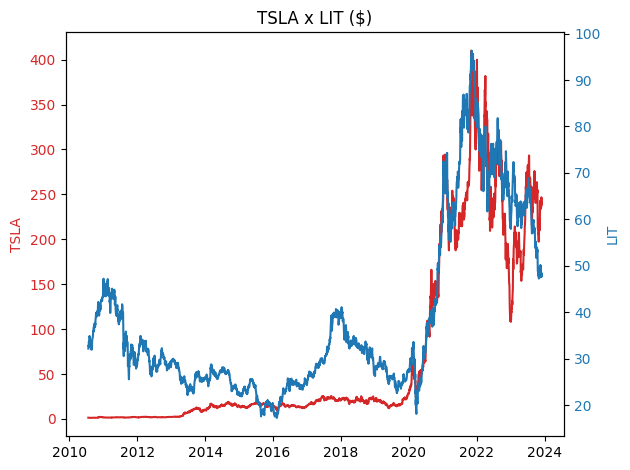

In [29]:
# Chart 1
x = comp['Date']
t = comp['TSLA']
l = comp['LIT']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_ylabel('TSLA', color=color)
ax1.plot(x, t, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('LIT', color=color)
ax2.plot(x, l, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('TSLA x LIT ($)')
fig.tight_layout()
plt.show()

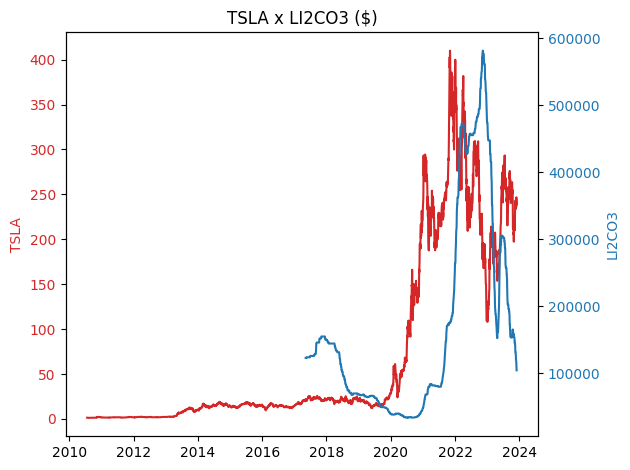

In [30]:
# Chart 2
x = comp['Date']
t = comp['TSLA']
l = comp['LI2CO3']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_ylabel('TSLA', color=color)
ax1.plot(x, t, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('LI2CO3', color=color)
ax2.plot(x, l, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('TSLA x LI2CO3 ($)')
fig.tight_layout()
plt.show()

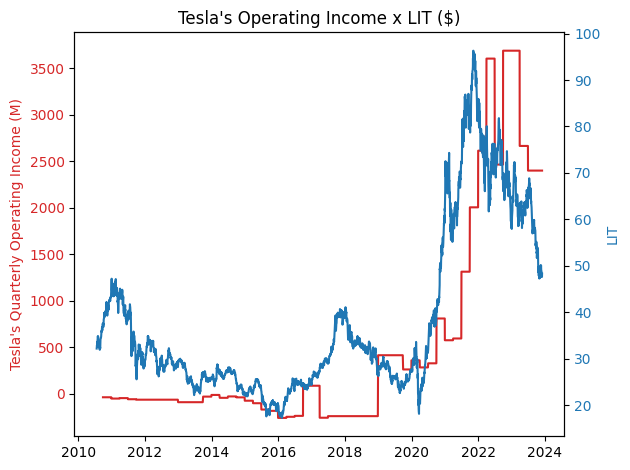

In [32]:
# Chart 3
x = comp['Date']
t = comp['T Operating Income']
l = comp['LIT']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_ylabel("Tesla's Quarterly Operating Income (M)", color=color)
ax1.plot(x, t, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('LIT', color=color)
ax2.plot(x, l, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Tesla's Operating Income x LIT ($)")
fig.tight_layout()
plt.show()

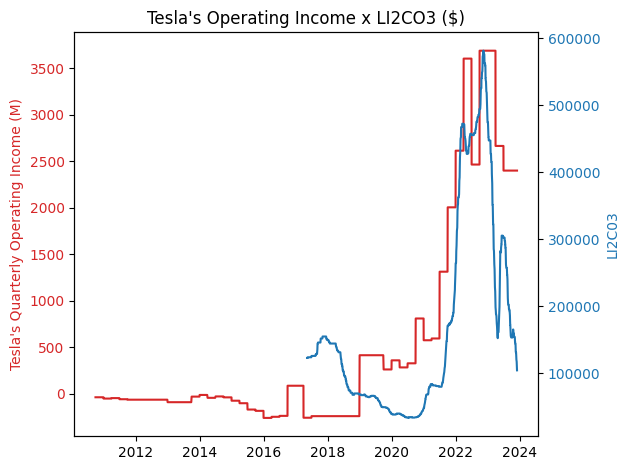

In [33]:
# Chart 4
x = comp['Date']
t = comp['T Operating Income']
l = comp['LI2CO3']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_ylabel("Tesla's Quarterly Operating Income (M)", color=color)
ax1.plot(x, t, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('LI2C03', color=color)
ax2.plot(x, l, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Tesla's Operating Income x LI2CO3 ($)")
fig.tight_layout()
plt.show()

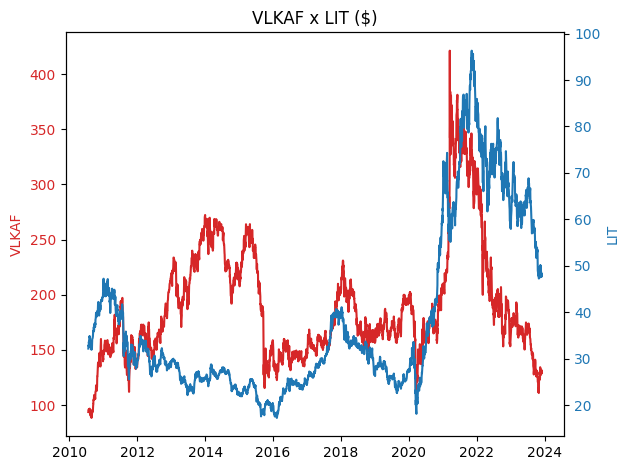

In [34]:
# Chart 5
x = comp['Date']
t = comp['VLKAF']
l = comp['LIT']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_ylabel("VLKAF", color=color)
ax1.plot(x, t, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('LIT', color=color)
ax2.plot(x, l, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("VLKAF x LIT ($)")
fig.tight_layout()
plt.show()

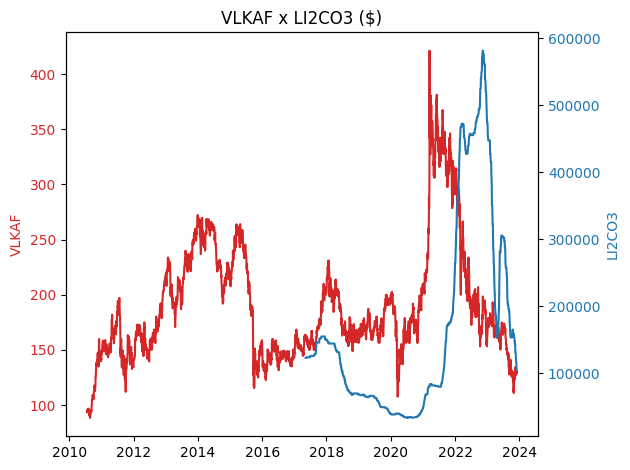

In [35]:
# Chart 6
x = comp['Date']
t = comp['VLKAF']
l = comp['LI2CO3']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_ylabel("VLKAF", color=color)
ax1.plot(x, t, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('LI2CO3', color=color)
ax2.plot(x, l, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("VLKAF x LI2CO3 ($)")
fig.tight_layout()
plt.show()

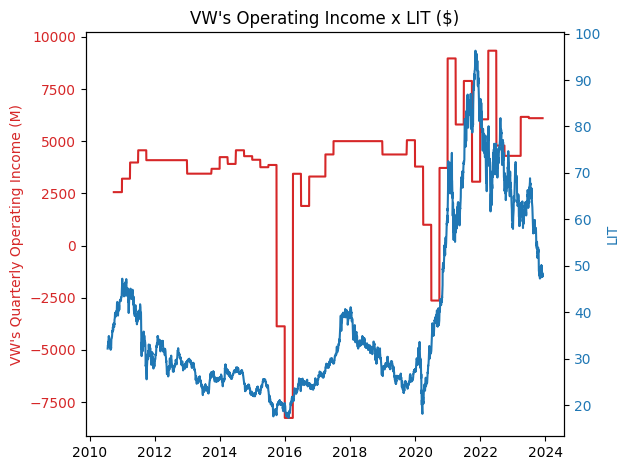

In [36]:
# Chart 7
x = comp['Date']
t = comp['VW Operating Income']
l = comp['LIT']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_ylabel("VW's Quarterly Operating Income (M)", color=color)
ax1.plot(x, t, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('LIT', color=color)
ax2.plot(x, l, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("VW's Operating Income x LIT ($)")
fig.tight_layout()
plt.show()

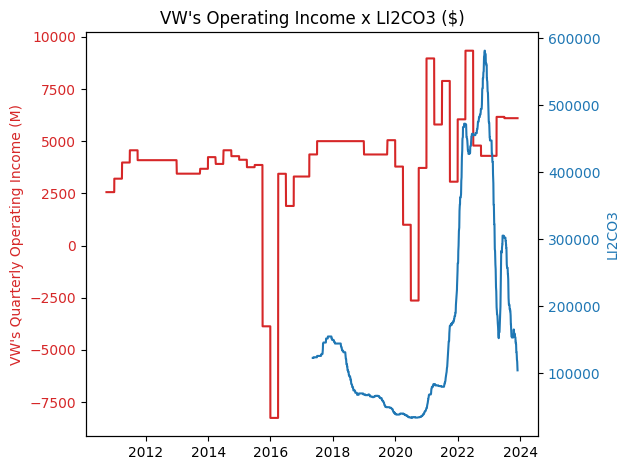

In [37]:
# Chart 8
x = comp['Date']
t = comp['VW Operating Income']
l = comp['LI2CO3']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_ylabel("VW's Quarterly Operating Income (M)", color=color)
ax1.plot(x, t, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('LI2CO3', color=color)
ax2.plot(x, l, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("VW's Operating Income x LI2CO3 ($)")
fig.tight_layout()
plt.show()

<Axes: >

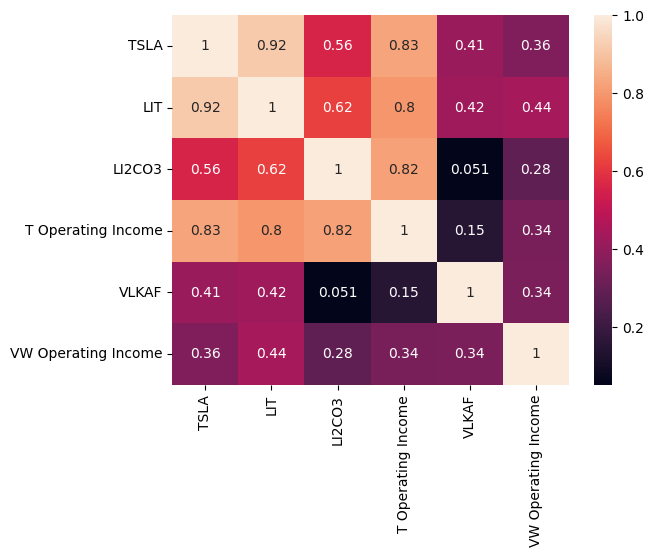

In [60]:
comp4corr = comp.drop('Date', axis=1)
corr_matrix = comp4corr.corr()
sn.heatmap(corr_matrix, annot=True)

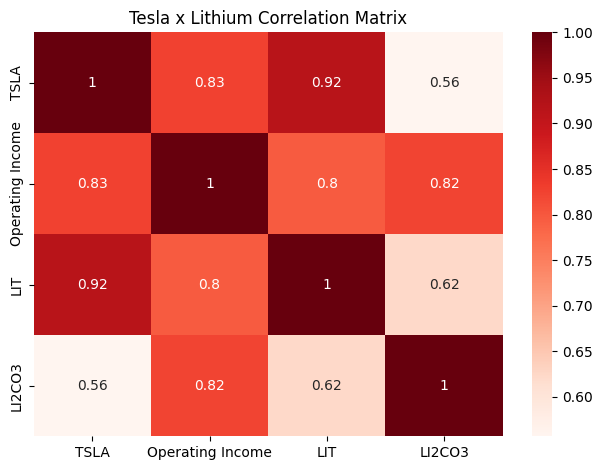

In [58]:
comp4corr = comp.drop('Date', axis=1)
comp4corr = comp4corr[['TSLA', 'T Operating Income', 'LIT', 'LI2CO3']]
comp4corr.rename(columns = {'T Operating Income':'Operating Income'}, inplace=True)
corr_matrix = comp4corr.corr()
sn.heatmap(corr_matrix, annot=True,cmap='Reds')
plt.title('Tesla x Lithium Correlation Matrix')
plt.tight_layout()
plt.show()

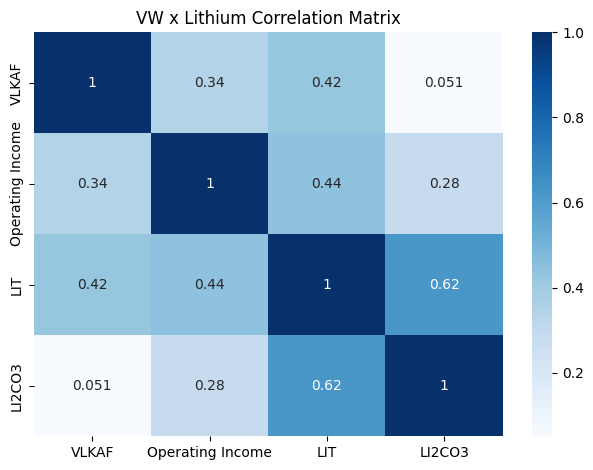

In [59]:
comp4corr = comp.drop('Date', axis=1)
comp4corr = comp4corr[['VLKAF', 'VW Operating Income', 'LIT', 'LI2CO3']]
comp4corr.rename(columns = {'VW Operating Income':'Operating Income'}, inplace=True)
corr_matrix = comp4corr.corr()
sn.heatmap(corr_matrix, annot=True,cmap='Blues')
plt.title('VW x Lithium Correlation Matrix')
plt.tight_layout()
plt.show()

In [245]:
from scipy import signal

compf = comp.dropna()

def ccf_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))  
    c = np.correlate(p, q, 'full')
    return c
    
ccf_tsla = ccf_values(compf['LI2CO3'], compf['TSLA'])
ccf_tsla

array([-0.0001663 , -0.00033455, -0.00050916, ...,  0.00070913,
        0.00048204,  0.00024678])

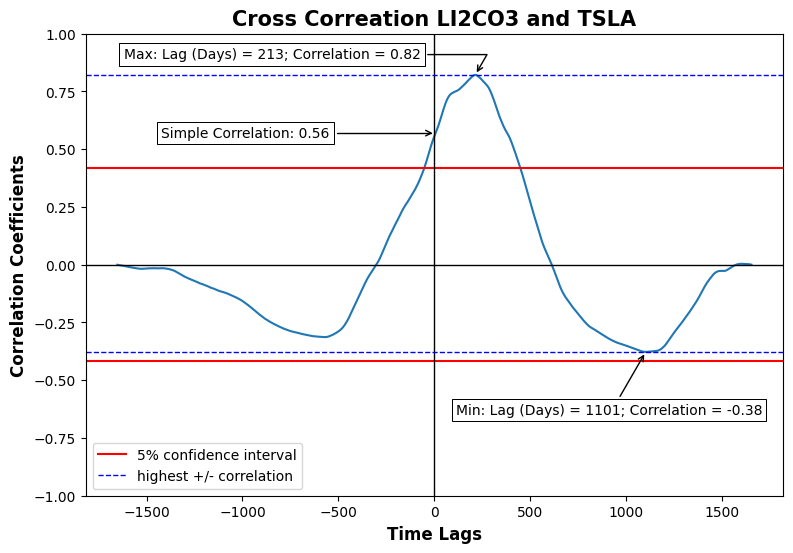

In [246]:
lags = signal.correlation_lags(len(compf['LI2CO3']), len(compf['TSLA']))

def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "Max: Lag (Days) = {:.0f}; Correlation = {:.2f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.48,0.97), **kw)

def annot_min(x,y, ax=None):
    xmin = x[np.argmin(y)]
    ymin = y.min()
    text= "Min: Lag (Days) = {:.0f}; Correlation = {:.2f}".format(xmin, ymin)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmin, ymin), xytext=(0.97,0.2), **kw)

def annot_corr(x,y, ax=None):
    x = 0
    y = 0.56
    text= "Simple Correlation: {:.2f}".format(y)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(x, y), xytext=(0.35,0.80), **kw)

def ccf_plot(lags, ccf):
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label='5% confidence interval')
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1, 
    linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1, 
    linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation LI2CO3 and TSLA', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', 
    fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)
    annot_max(lags,ccf)
    annot_min(lags,ccf)
    annot_corr(lags, ccf)
    plt.legend()
    
ccf_plot(lags, ccf_tsla)